![SegmentLocal](./images_STUDIP/Logo2.png)

# Chapter 3: Analyzing Eye Tracking Data



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item">
    <li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-0.1"><span class="toc-item-num"></span>Prerequisites</a></span></li>
    <li><span><a href="#Scope-of-this-Sheet" data-toc-modified-id="Scope-of-this-Shee-0.2"><span class="toc-item-num"></span>Scope of this Sheet</a></span></li></ul></li>
    <li><span><a href="#1.-Loading-and-cleaning-Eye-tracking-data" data-toc-modified-id="1.-Loading-and-cleaning-Eye-tracking-data"><span class="toc-item-num"></span>1. Loading and cleaning Eye tracking data</a></span><ul class="toc-item"><li><span><a href="#1.1-Loading-the-Eye-tracking-dataset" data-toc-modified-id="1.1-Loading-the-Eye-tracking-dataset-1.1"><span class="toc-item-num"></span>1.1 Loading the Eye tracking dataset</a></span></li><li><span><a href="#1.2-Cleaning-the-Eye-tracking-dataset" data-toc-modified-id="1.2-Cleaning-the-Eye-tracking-dataset-1.2"><span class="toc-item-num"></span>1.2 Cleaning the Eye tracking dataset</a></span></li><li><span><a href="#1.3-Checking-data-distribution" data-toc-modified-id="1.3-Checking-data-distribution-1.3"><span class="toc-item-num"></span>1.3 Checking data distribution</a></span></li></ul></li><li><span><a href="#2.-Fixations-and-saccades" data-toc-modified-id="2.-Fixations-and-saccades-2"><span class="toc-item-num"></span>2. Fixations and saccades</a></span><ul class="toc-item"><li><span><a href="#2.1-Effect-of-stimulus-category-on-fixations" data-toc-modified-id="2.1-Effect-of-stimulus-category-on-fixations-2.1"><span class="toc-item-num"></span>2.1 Effect of stimulus category on fixations</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Visual-analysis" data-toc-modified-id="2.1.1-Visual-analysis-2.1.1"><span class="toc-item-num"></span>2.1.1 Visual analysis</a></span></li><li><span><a href="#2.1.2-Statistical-analysis" data-toc-modified-id="2.1.2-Statistical-analysis-2.1.2"><span class="toc-item-num"></span>2.1.2 Statistical analysis</a></span></li></ul></li><li><span><a href="#2.2-Fixations-over-time" data-toc-modified-id="2.2-Fixations-over-time-2.2"><span class="toc-item-num"></span>2.2 Fixations over time</a></span></li><li><span><a href="#2.3-Leftward-Bias" data-toc-modified-id="2.3-Leftward-Bias-2.3"><span class="toc-item-num"></span>2.3 Leftward Bias</a></span></li></ul></li><li><span><a href="#3.-Following-the-gaze" data-toc-modified-id="3.-Following-the-gaze-3"><span class="toc-item-num"></span>3. Following the gaze</a></span><ul class="toc-item"><li><span><a href="#3.1-Heat-map" data-toc-modified-id="3.1-Heat-map-3.1"><span class="toc-item-num"></span>3.1 Heat map</a></span></li><li><span><a href="#3.2-Scanpath" data-toc-modified-id="3.2-Scanpath-3.2"><span class="toc-item-num"></span>3.2 Scanpath</a></span></li></ul></li><li><span><a href="#Summary---What-you-have-learned-about-eye-tracking" data-toc-modified-id="Summary---What-you-have-learned-about-eye-tracking-6"><span class="toc-item-num"></span>Summary - What you have learned about eye tracking</a></span></li><li><span><a href="#Further-reading" data-toc-modified-id="Further-reading-7"><span class="toc-item-num"></span>Further reading</a></span></li><li><span><a href="#Citations" data-toc-modified-id="Citations-8"><span class="toc-item-num"></span>Citations</a></span></li></ul></div>

### Prerequisites
For this chapter, you should be familiar with the following concepts and techniques:
* Basic Python programming
* Working with Pandas
* Statistical Analysis
* Statistical plotting

### Scope of this Sheet

Before you start working on this chapter, make sure you've watched the **introductory video** and recapped your knowledge on the **anatomy and physiology on human vision**. If not, go back to Stud.IP and watch the videos before starting working on this chapter.

In this chapter we will work with a collection of eye tracking data from several studies conducted at the Institute of Cognitive Science, University of Osnabrueck and at the University Medical Center Hamburg-Eppendorf. 

Take a look at the paper for more information on the dataset and the individual studies: <br>
[ Wilming, N. et al. (2017). An extensive dataset of eye movements during viewing of complex images. Sci. Data 4:160126.](https://doi.org/10.1038/sdata.2016.126)

The data is openly distributed and can be downloaded [here](https://datadryad.org/stash/dataset/doi:10.5061/dryad.9pf75). <br> **Click on the file names below to download only the files required for this chapter, do not download the complete dataset:**
* [etdb_v1.0.hdf5](https://datadryad.org/stash/downloads/file_stream/12094)  This is the main data file. The hdf5 file consists of all the fixation data and the metadata.
* [fixmat.py](https://datadryad.org/stash/downloads/file_stream/12096)  Python script to read hdf5 file as a Pandas dataframe. 
* [Stimuli_7.zip](https://datadryad.org/stash/downloads/file_stream/12100), [Stimuli_8.zip](https://datadryad.org/stash/downloads/file_stream/12101), [Stimuli_10.zip](https://datadryad.org/stash/downloads/file_stream/12102), [Stimluli_11.zip](https://datadryad.org/stash/downloads/file_stream/12103)  Zip files containing image stimuli used in the study. The encoding convention is the same as in the dataframe.
* [meta.csv](https://datadryad.org/stash/downloads/file_stream/12095)  Metadata. This is a csv file giving an overview of all studies.

Make sure to store the data files in the same directory as this notebook.

<div class="alert alert-block alert-warning">
<b>Note:</b> The data we will use in this chapter are already preprocessed,
    instead of raw gaze data it contains the coordinates of fixation poitns.
</div>


## 1. Loading and cleaning Eye tracking data

### 1.1 Loading the Eye tracking dataset
As usual, the first step is to load the data and to get an idea of how the data look like before we start doing any data analysis. It's always a good idea to spend some time familiarizing with the data, this will turn out to be very helpful when it comes to checking whether there are any mistakes in the subsequent analysis. Take a look at the meta data and the columns of the dataframe.

In [2]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Python packages required for this chapter
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import *
import fixmat

In [4]:
# Use fixmat.py to load the hdf5 format data as a pandas dataframe
df, meta = fixmat.load('etdb_v1.0.hdf5', "Baseline")

C:\Users\yj941\Jupyter_Notebooks_ACC\fixmat.py:23: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(dbname) as f:


In [5]:
# Take a look at the metadata
meta

{'# Fix.': 203772,
 '# Obs.': 48,
 'Age': '23.1 (19-28)',
 'Article': 15.0,
 'Categories': '7,8,10,11',
 'Disp. Size (degree)': '29x22',
 'Display': 'SM1100',
 'Display resolution (pixels)': '1280x960',
 'Eye Tracker': 'EL II',
 'ID': 3,
 'Img. Pos. (pixel)': '0,0',
 'Img. size (pixel)': '1280x960',
 'PPD': 45.6,
 'Sampling freq. (Hz)': '500 Hz',
 'Task': 'FV',
 'V. Dur.': '6s',
 'V. dist. (cm) ': 80,
 'Val. error (degrees)': 0.3}

In [6]:
# Take a look at the columns of the datafram
df.columns

Index(['SUBJECTINDEX', 'category', 'dataset_nr', 'end', 'eye', 'filenumber',
       'fix', 'pupil', 'start', 'trial', 'x', 'y'],
      dtype='object')

In [7]:
# Take a look at the head of the data frame
df.head()

SUBJECTINDEX  category  dataset_nr     end  eye  filenumber  fix  \
0           1.0      11.0         3.0   215.0  2.0        25.0  1.0   
1           1.0      11.0         3.0   503.0  2.0        25.0  2.0   
2           1.0      11.0         3.0   819.0  2.0        25.0  3.0   
3           1.0      11.0         3.0  1103.0  2.0        25.0  4.0   
4           1.0      11.0         3.0  1399.0  2.0        25.0  5.0   

         pupil   start  trial      x      y  
0  3287.901123  -183.0    1.0  636.0  489.0  
1  2872.182129   261.0    1.0  524.0  276.0  
2  2452.396484   541.0    1.0  592.0  393.0  
3  2135.433594   865.0    1.0  367.0  339.0  
4  2007.327393  1145.0    1.0  196.0  364.0

In [8]:
# Take a look at the tail of the data frame
df.tail()

SUBJECTINDEX  category  dataset_nr     end  eye  filenumber   fix  \
203767          48.0      10.0         3.0  5042.0  1.0        41.0  15.0   
203768          48.0      10.0         3.0  5382.0  1.0        41.0  16.0   
203769          48.0      10.0         3.0  5614.0  1.0        41.0  17.0   
203770          48.0      10.0         3.0  5818.0  1.0        41.0  18.0   
203771          48.0      10.0         3.0  6018.0  1.0        41.0  19.0   

              pupil   start  trial      x      y  
203767  4040.249756  4680.0  255.0  627.0  485.0  
203768  4149.126953  5084.0  255.0  721.0  620.0  
203769  4093.525146  5408.0  255.0  776.0  567.0  
203770  3995.060791  5652.0  255.0  805.0  431.0  
203771  3846.478027  5872.0  255.0  654.0  218.0

### 1.2 Cleaning the eye tracking dataset
We want to clean the dataframe so that it is handy for us to work with.
- First of all, calculate the number of fixations per category. We do this before cleaning the data in order to check how much data we delete during the cleaning process.
Tipp: Take a look at the Pandas functions [```groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [```agg()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)


- Remove all rows with any NaN values.
- Add a column ```str_category``` to the dataframe that contains the string value of each category. Categories are encoded using the following numbers: 7 : Natural, 8 : Urban, 10 : Fractal, 11 : Pink-noise (see Figure 2 of the paper)
- Add a column called ```duration``` and compute the duration of each fixation.
- Remove any fixation points that have an onset time before 0 sec and an end time after 6 sec. Since measurements lasted for 6 seconds, those rows are erronous and have to be deleted.
- In order to filter out fixation durations which are outliers, we will use median absolute deviation based outlier detection. Take a look at the function ```mad_outlier(data, threshold)``` and use this function to remove fixation durations which have a modified z-value of more than 3.5. If you are interested, you can read about [why we are using median absolute deviation instead of standard z-transformation](https://core.ac.uk/display/17349316) and about [how to calculate modified z-scores](https://www.pdf-archive.com/2016/07/29/outlier-methods-external/outlier-methods-external.pdf).
Tipp: The function ```mad_outlier(data, threshold)```returns a mask, [refresh your knowledge about masking](https://pythonhealthcare.org/2018/04/07/30-using-masks-to-filter-data-and-perform-search-and-replace-in-numpy-and-pandas/) if necessary.


- Now repeat the first step - calculating the number of fixations per category - and check how many data points have been removed for each category.
- Finally, calculate the mean duration of all the fixations that have survived data cleaning.

In [9]:
# TODO: How many fixations are there for each category?
categories = df.groupby('category')['fix'].agg('count')

# TODO: Drop all columns with NaN valus
df = df.dropna()

# TODO: Add a column "str_category"
df['str_category'] = df['category'].replace({7:'Natural', 8:'Urban', 10:'Fractal', 11:'Pink-noise'})

# TODO: Add a column "duration"
df['duration'] = df['end'] - df['start']

# TODO: Remove fixations which have an on- / offset outside the intervall [0 - 6 sec]
df = df[(df['start'] >= 0) & (df['start'] < 6000) & (df['end'] <= 6000)]

def mad_outlier(data, threshold=3.5):
    """ Median Absolute deviation based outlier detection.
    Returns a booelan mask (True if z < threshold, else False)."""
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_score = 0.6745 * (data - median) / mad

    return modified_z_score < threshold

# TODO: Remove outliers with respect to fixation duration
df_cleaned = df.loc[mad_outlier(df['duration']), :]

# TODO: How many fixations are left after cleaning the data?
df_cleaned.groupby('category')['fix'].count()

# TODO: Calculate the mean duration of all fixations
duration_mean = df_cleaned['duration'].mean()
print('Mean duration of all fixations is {:.1f} msec'.format(duration_mean))

Mean duration of all fixations is 268.0 msec


In [10]:
#df_cleaned = df.loc[mad_outlier(df['duration']),:]
df_cleaned = df[mad_outlier(df['duration'])]
df_cleaned

SUBJECTINDEX  category  dataset_nr     end  eye  filenumber   fix  \
1                1.0      11.0         3.0   503.0  2.0        25.0   2.0   
2                1.0      11.0         3.0   819.0  2.0        25.0   3.0   
3                1.0      11.0         3.0  1103.0  2.0        25.0   4.0   
4                1.0      11.0         3.0  1399.0  2.0        25.0   5.0   
5                1.0      11.0         3.0  1939.0  2.0        25.0   6.0   
...              ...       ...         ...     ...  ...         ...   ...   
203766          48.0      10.0         3.0  4634.0  1.0        41.0  14.0   
203767          48.0      10.0         3.0  5042.0  1.0        41.0  15.0   
203768          48.0      10.0         3.0  5382.0  1.0        41.0  16.0   
203769          48.0      10.0         3.0  5614.0  1.0        41.0  17.0   
203770          48.0      10.0         3.0  5818.0  1.0        41.0  18.0   

              pupil   start  trial      x      y str_category  duration  
1       2872.182129   261.0    1.0  524.0  276.0   Pink-noise     242.0  
2       2452.396484   541.0    1.0  592.0  393.0   Pink-noise     278.0  
3       2135.433594   865.0    1.0  367.0  339.0   Pink-noise     238.0  
4       2007.327393  1145.0    1.0  196.0  364.0   Pink-noise     254.0  
5       2159.601562  1449.0    1.0  564.0  421.0   Pink-noise     490.0  
...             ...     ...    ...    ...    ...          ...       ...  
203766  3850.956299  4364.0  255.0  405.0  280.0      Fractal     270.0  
203767  4040.249756  4680.0  255.0  627.0  485.0      Fractal     362.0  
203768  4149.126953  5084.0  255.0  721.0  620.0      Fractal     298.0  
203769  4093.525146  5408.0  255.0  776.0  567.0      Fractal     206.0  
203770  3995.060791  5652.0  255.0  805.0  431.0      Fractal     166.0  

[183459 rows x 14 columns]

In [11]:
# Now that we've cleaned the data, take a look at the head of the cleaned data frame again.
# You should see two additional columns, "str_category" and "duration".
df_cleaned.head()

SUBJECTINDEX  category  dataset_nr     end  eye  filenumber  fix  \
1           1.0      11.0         3.0   503.0  2.0        25.0  2.0   
2           1.0      11.0         3.0   819.0  2.0        25.0  3.0   
3           1.0      11.0         3.0  1103.0  2.0        25.0  4.0   
4           1.0      11.0         3.0  1399.0  2.0        25.0  5.0   
5           1.0      11.0         3.0  1939.0  2.0        25.0  6.0   

         pupil   start  trial      x      y str_category  duration  
1  2872.182129   261.0    1.0  524.0  276.0   Pink-noise     242.0  
2  2452.396484   541.0    1.0  592.0  393.0   Pink-noise     278.0  
3  2135.433594   865.0    1.0  367.0  339.0   Pink-noise     238.0  
4  2007.327393  1145.0    1.0  196.0  364.0   Pink-noise     254.0  
5  2159.601562  1449.0    1.0  564.0  421.0   Pink-noise     490.0

### 1.3 Checking data distribution
For now we've cleaned the data, but we still don't know how the data are distributed. It's important to check how the data are distributed before we start doing any statistical analysis, since many parametric analysis procedures assume normally distributed data among other assumptions. Keep in mind that you always have to check whether the assumptions of the statistical test you want to apply are in line with your data, otherwise the results of your analysis are meaningless.

- Visualize the fixation durations in form of a histrogram with a Gaussian kernel density estimate on top of it. This gives you a first visual intution how the data is distributed. Make one histogram of fixation durations before outlier removal and one after outlier removal, inspect how outlier removal has affected the data distribution. Tipp: Take a look at Seaborn's [```distplot()```](https://seaborn.pydata.org/generated/seaborn.distplot.html) function.
- Use a [QQ-plot](https://en.wikipedia.org/wiki/Q–Q_plot) to compare the distribution of fixation durations after data cleaning against a normal distribution. <br> Tipp: Take a look at [statsmodel.qq-plot()](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html).
- If the data is not normally distributed, it can be useful to do a log-transformation. Log-transform fixation durations and add a new column ```log_duration``` to the dataframe (use the cleaned dataframe obtained after outlier removal). Repeat the previos two steps for log-transformed fixation durations (one histogram and one QQ-plot for log-transformed fixation durations).

<div class="alert alert-block alert-warning">
    For the subsequent analysis we will <b>not</b> use the log-transformed fixation durations, the last part of this exercise is just supposed to be an illustration of what happens to the data when performing a log-transformation.
</div>

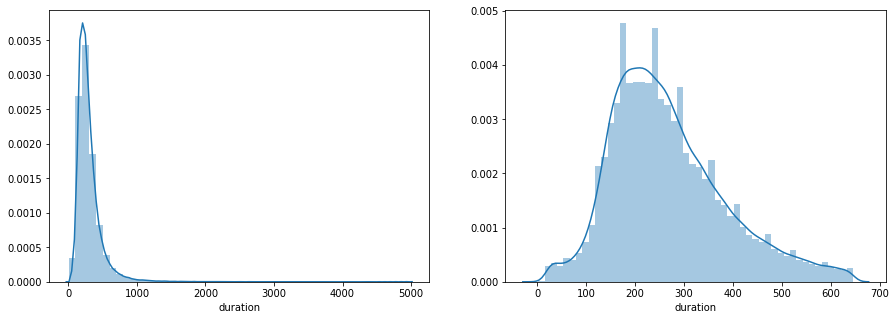

In [12]:
# TODO: Visualize the data distribution of fixation durations before and after data cleaning
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
sns.distplot(df["duration"], ax = axes[0])
sns.distplot(df_cleaned["duration"], ax = axes[1])

[Text(0.5, 1.0, 'QQplot: Fixation durations against normal distribution')]

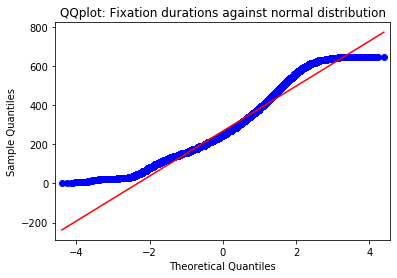

In [13]:
# TODO: QQ-Plot of fixation durations after data cleaning
fig, axes = plt.subplots()
sm.qqplot(df_cleaned['duration'], line='r', ax = axes)
axes.set(title = 'QQplot: Fixation durations against normal distribution')


In [14]:
# TODO: Log-transform fixation durations
df_cleaned.loc[:,['log_duration']] = np.log(df_cleaned['duration'].values)


# TODO: Histogram and QQ-plot for log-transformed fixation durations
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.distplot(df_cleaned['log_duration'], ax = axes[0])
sm.qqplot(df_cleaned['log_duration'], line = 'r', ax = axes[1])

plt.show()

KeyError: "None of [Index(['log_duration'], dtype='object')] are in the [columns]"

## 2. Fixations and saccades

### 2.1 Effect of stimulus category on fixations

In the following, we want to investigate if the category of the visual stimulus (Natural, Urban, Fractal, or Pink-noise) has an effect on the number and the duration of fixations. First, we will approach this question visually, after that we will formulate and test our hypothesis statistically.

### 2.1.1 Visual analysis
Before we can start plotting, we have to extract some information from our data that is not yet listed in our data frame:
- Calculate the number of fixations per subject per trial. You have to sort the data according to the different subjects and trials and count how many fixations are there for each subject for each of the trials. Tipp: The function [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) can take more than one argument according to which it groups the data.
- Analogously, calculate the number of fixations per category. This involves taking into account the category of visual stimuli in addition to what you did in order to calculate the number of fixations per subject per trial. You have to sort the data according to the category, the different subjects, and the trials and count how many fixations are there for each category for each subject for each of the trials.

In [15]:
# TODO: Calculate number of fixations per subject per trial
fixations_per_subject = df_cleaned.groupby(['SUBJECTINDEX', 'trial'])['fix'].agg('count')

# TODO: Calculate number of fixations per category per subject per trial
fixations_per_category = df_cleaned.groupby(['str_category', 'SUBJECTINDEX', 'trial'])['fix'].agg('count')


In [16]:
fixations_per_category

str_category  SUBJECTINDEX  trial
Fractal       1.0           5.0      19
                            11.0     18
                            12.0     17
                            13.0     17
                            14.0     17
                                     ..
Urban         48.0          242.0    17
                            245.0    15
                            250.0    19
                            253.0    19
                            254.0    20
Name: fix, Length: 12156, dtype: int64

Now we can do the plotting:
- Plot the mean fixation duration for each category (4 x-values) and the mean fixation duration for each subject (48 x-values) as bar plots. For this, you don't need what you calculated in the previous part of the exercise.
- Plot the mean number of fixations for each category (4 x-values) and the mean number of fixations for each subject (48 x-values) as bar plots. Use what you calculated in the previous part of the exercise.

Tipp: For the task at hand it's easier to use Pandas' [```plot()```](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html) function (you have to choose an appropiate parameter for the keyword argument ```kind```) instead of using Seaborn or Matplotlib explicitly. You will have to adjust the x-ticks and x-tick-labels such that the bar plots displaying the mean values of 48 subjects are well readable.

Text(0.5, 0.98, 'Mean number of fixations')

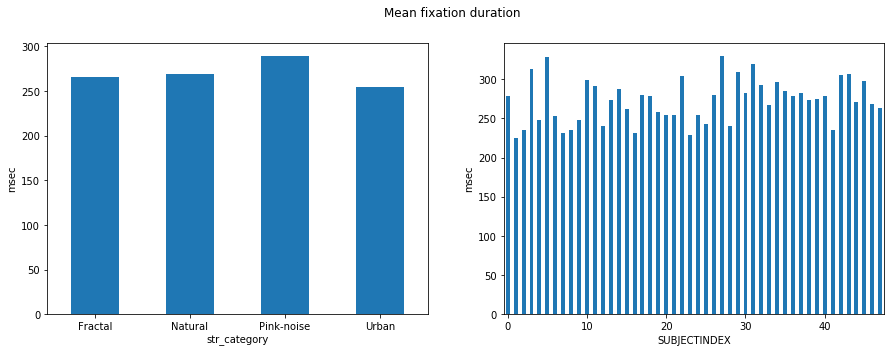

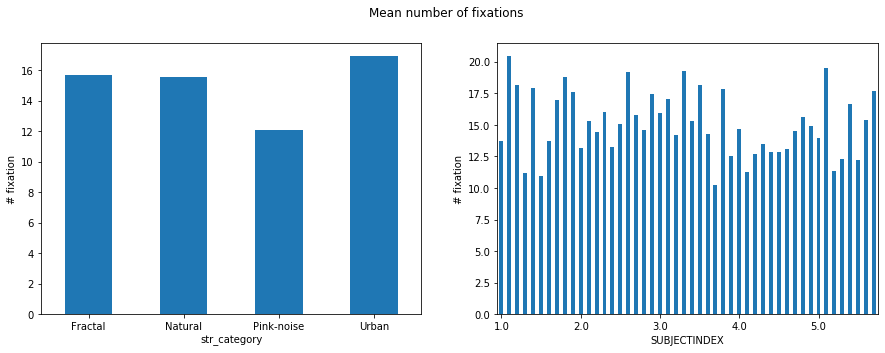

In [17]:
# TODO: Plot mean fixation durations
fig1, axes1 = plt.subplots(1,2,figsize=(15,5))
df_cleaned.groupby(['str_category'])['duration'].agg('mean').plot(ax = axes1[0], kind = 'bar')
df_cleaned.groupby(['SUBJECTINDEX'])['duration'].agg('mean').plot(ax = axes1[1], kind = 'bar')
axes1[0].set(ylabel="msec")
axes1[0].set_xticklabels(axes1[0].get_xticklabels(), rotation = 0)
axes1[1].set_xticklabels(axes1[1].get_xticklabels(), rotation = 0)
axes1[1].set(ylabel='msec', xticks = axes1[1].get_xticks()[::10])
axes1[1].xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%s'))
fig1.suptitle('Mean fixation duration')

# TODO: Plot mean number of fixations
fig2, axes2 = plt.subplots(1,2,figsize=(15,5))
fixations_per_category.groupby('str_category').agg('mean').plot(ax = axes2[0], kind = 'bar')
fixations_per_category.groupby('SUBJECTINDEX').agg('mean').plot(ax = axes2[1], kind = 'bar')
axes2[0].set(ylabel = '# fixation')
axes2[0].set_xticklabels(axes2[0].get_xticklabels(), rotation = 0)
axes2[1].set_xticklabels(axes2[1].get_xticklabels(), rotation = 0)
axes2[1].set(ylabel = '# fixation', xticks = axes2[1].get_xticks()[::10])
fig2.suptitle('Mean number of fixations')


An alternative way of doing visual analysis would be to use Gaussian kernel density estimates and to see how much the distributions overlap (you kind of did this in section 4.3 when you plotted histograms with Gaussian kernel density estimates superimposed on it). For the sake of illustration, we will plot Gaussian kernel density estimates for the fixation durations for each category. Again, use Pandas' [plot()](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html) function and take a look at the options offered for the keyword argument ```kind```.

category
7.0     AxesSubplot(0.125,0.125;0.775x0.755)
8.0     AxesSubplot(0.125,0.125;0.775x0.755)
10.0    AxesSubplot(0.125,0.125;0.775x0.755)
11.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

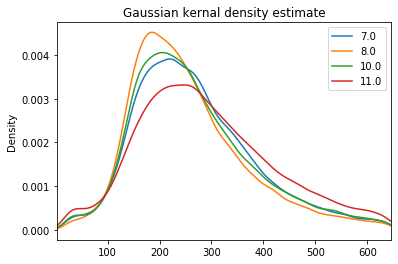

In [18]:
# TODO: Plot Gaussian kernel density estimates for fixation durations for each category
df_cleaned.groupby('category')['duration'].plot(kind = 'kde', 
                                                xlim = [min(df_cleaned['duration']), 
                                                        max(df_cleaned['duration'])], 
                                                legend = True, 
                                                title = 'Gaussian kernal density estimate')

### 2.2.2 Statistical analysis
Looking at the visual analysis, it seems like there are some differences in fixation duration and number of fixations with respect to the different categories of visual stimuli. Let's do a thorough statistical analysis. First of all, we have to formulate our hypothesis:

Fixation duration: <br> 
$H_0$: There is no difference in fixation duration across the 4 different categories of visual stimuli. <br>
$H_1$: There is a difference in fixation duration across the 4 different categories of vosual stimuli.

Number of fixations: <br>
$H_0$: There is no difference in the number of fixations across the 4 different categories of visual stimuli. <br>
$H_1$: There is a difference in the number of fixations across the 4 different categories of visual stimuli.

Test our hypothesis regarding fixation duration and number of fixations using an ANOVA. Since we are dealing with multiple fixations per subject, we have to use a [repeated measure ANOVA](https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM).

In [19]:
# TODO: Repeated measure ANOVA testing hypothesis 'fixation duration'
result = AnovaRM(data = df_cleaned, depvar = 'duration', subject = 'SUBJECTINDEX', within = ['category'], aggregate_func = 'mean').fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Anova
=======================================
         F Value Num DF  Den DF  Pr > F
---------------------------------------
category 97.6868 3.0000 141.0000 0.0000
=======================================

"""

In [20]:
# TODO: Repeated measure ANOVA testing hypothesis 'number of fixations'
AnovaRM(df_cleaned, depvar = 'fix', subject = 'SUBJECTINDEX', within = ['category'], aggregate_func = 'mean').fit().summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Anova
========================================
         F Value  Num DF  Den DF  Pr > F
----------------------------------------
category 121.8143 3.0000 141.0000 0.0000
========================================

"""

### 2.2 Fixations over time
Previously, we analyzed the number and duration of fixations, however, so far we didn't care about the timing of fixations. We only used the fixation on- and offset markers to calculate fixation durations. Remember that during data cleaning we removed all fixations which have an on- or offset before 0 seconds or after 6 seconds. Also keep in mind that after data cleaning all fixations are shorter than 700 milliseconds. Thus, our data contains fixations which occured at some point during a 6 seconds trial and there is probably some variation regarding the timing. Therefore, we would like to know if there is a difference in terms of fixation numbers at different time segments of our 6 seconds trials.
- Separate the data into 6 bins according to the fixation onset. Bin no. 0 contains all fixations that have an onset in the intervall $[0,1)$ sec, bin no. 1 contains all fixations that have an onset in the intervall $[1,2)$ sec, and so on. Add a column ```bin```to the data frame which denotes the bin of each fixation with respect to fixation onset.
- Plot a histogram showing the number of fixations in each bin, use one bar per bin (6 bars in total). The x-axis denotes fixation onset in msec. Tipp: Use Panda's [```hist()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function, in this case it requires less manual specification than using Seaborn.
- Calculate the number of fixations for each bin. Tipp: Use the Pandas functions [```groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [```agg()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html), like in section 4.2.

C:\Users\yj941\Anaconda3\envs\acc\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\yj941\Anaconda3\envs\acc\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


bin
0.0    31532
1.0    32941
2.0    32881
3.0    32331
4.0    31549
5.0    22225
Name: fix, dtype: int64


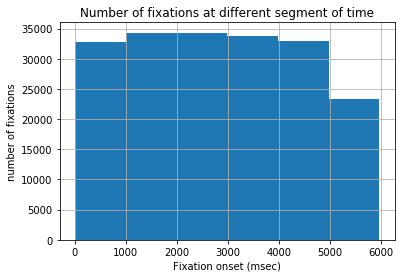

In [21]:
# TODO: Add column "bin" to dataframe
df_cleaned.loc[:, 'bin'] = df_cleaned.loc[:, 'start']//1000


# TODO: Plot number of fixations per bin
fig, axes = plt.subplots()
df.hist(column = 'start', bins = 6, ax = axes)
axes.set(xlabel = 'Fixation onset (msec)', ylabel = 'number of fixations', title = 'Number of fixations at different segment of time')

# TODO: Calculate number of fixations for each bin
print(df_cleaned.groupby('bin')['fix'].agg('count'))

### 2.3 Leftward Bias

<div class="alert alert-block alert-info">
As you may know from neuroscience lectures on the visual system, there is a phenomenon called <b>leftward bias</b>, meaning that humans tend to make more fixations in the left visual field during the first second after stimulus onset. A study by <a href="https://doi.org/10.1167/16.11.8">Afsari et al.</a> characterizes the leftward bias as a dynamic property that can be modulated, for instance by habitual reading direction. Take a look at the paper if you are interested.
</div>


We want to check whether we can find a leftward bias in our dataset as well. Since it is known that the leftward bias occurs during the first second after stimulus onset, we will take advantage of the binning with respect to fixation onset which we did in section 5.3.

- Make a [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html): The x-axis represents the x coordinate (horizontal direction) of fixations and the y-axis the time segment with respect to fixation onset. Tipp: A point plot is different from a scatter plot, a point plot represents an estimate of central tendency based on multiple x-values which share the same y-value. Hence, you are supposed to end up with one data point (the mean of all x coordinates) for each time segment. Luckily, you don't have to calculate that manually, just take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.pointplot.html).
- Add confidence intervalls around each point. Tipp: The keyword argument ```ci``` may help.
- Add a [vertical line](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html) representing the center of the visual field. Tipp: The minimum value of the x-coordinate is 0, that's the leftmost part of the stimulus. The maximum value of the x-coordinate corresponds to the maximum x-value of the screen resolution. Take a look at the meta data (section 4.1), there's a section ```Display resolution (pixels)```. The center of the visual field is the half-maximum value of the x-coordinate.

Compare the tendencies of horizontal fixation locations among the different time segments. Can you see a leftward bias during the first second after stimulus onset in the data?

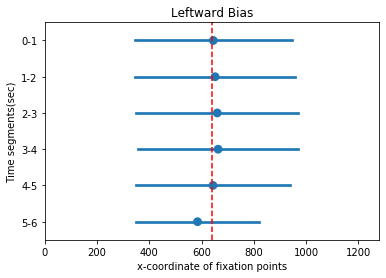

In [22]:
# TODO: Point plot of tendencies of horizontal fixation locations in each time segment
# ax = sns.pointplot(x="x", y="bin", data=df_cleaned)
fig, axes = plt.subplots()
sns.pointplot(ax = axes, data = df_cleaned, x = 'x', y = 'bin', orient = 'h', ci = 'sd', linestyles = '')
plt.axvline(x = df_cleaned['x'].mean(), color = 'r', linestyle = '--')
axes.set(xlim = [0,1280], title = 'Leftward Bias', xlabel = 'x-coordinate of fixation points', ylabel = 'Time segments(sec)', yticklabels = ['5-6', '4-5','3-4','2-3','1-2','0-1'])
plt.gca().invert_yaxis()

plt.show()
# TODO: Add a vertical line representing the center of the visual field


## 3. Following the gaze
Up until now, we've looked at eye tracking data in a rather stationary way by analyzing the number of occurences, the duration, the timing and the location of fixations with respect to different visual stimuli. Taking together all this data, we can actually reconstruct someones viewing patter, that's one of the really cool things about eye tracking. In the following, we will exploit the spatial and temporal information that is revealed by looking at dynamic sequences of fixations rather than at individual fixation points.

### 3.1 Heat map

<div class="alert alert-block alert-info">
    A <b>heat map</b> can be interpreted as an indicator of saliency of different regions of a visual stimulus. A heat map shows how often certain parts of a visual stimulus are fixated.
</div>

Here's an example of a heat map: ![heat map](https://upload.wikimedia.org/wikipedia/commons/5/50/Eyetracking_heat_map_Wikipedia.jpg)

Let's create a heat map for our data. First, we will compute a heat map taking all data points into account, regardless of the stimulus category, later on we will create individual heat maps for each stimuli category.

- Since we are interested in the location of fixations, the ```x``` and ```y```coordinates are of importance
- Take a look at the function [```np.histogram2d()```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html). It returns a 2-dimensional histogram as well as two arrays containing the bin edges along each axis. Tipp: Use the keyword arguments ```bins=100```and ```density=True```
- The 2-d histrogram returned by [```np.histogram2d()```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html) does not follow the Cartesian convention, the x- and y-axis are swapped. Therefore, you have to transpose the 2-d histogram before plotting it.
- Define an array ```extent``` containing the coordinates of the four corners of the heatmap. Tipp: Use the first/minimum and last/maximum value of the bin edges returned by [```np.histogram2d()```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html).
- Take a look at the function [```imshow()```](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow). Tipp: Use the keyword arguments ```extent=extent```, ```origin='lower'```, ```cmap='plasma'```, and ```interpolate='gaussian'```.
- Add a fixation cross at the center of the heat map as a reference. Tipp: Calculate x- and y-coordinates of the fixation cross based on the display resolution (see metada), like you did for the vertical line in section 5.4.

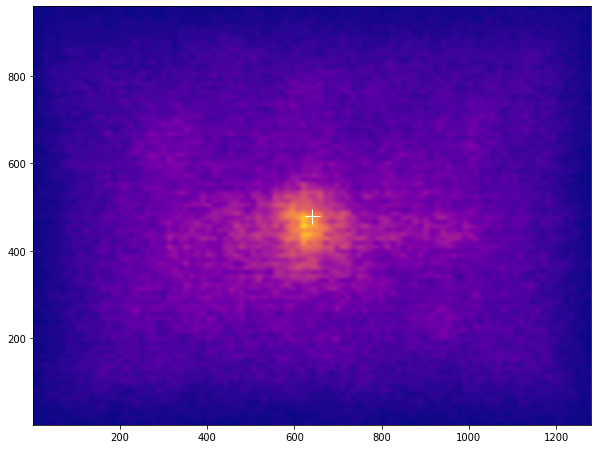

In [23]:
# TODO: Create a heat map using all data points
fig, axes = plt.subplots(figsize=(10,10))
heatmap, xedges, yedges = np.histogram2d(df_cleaned["x"], df_cleaned["y"], bins=100, density=True)
heatmap = heatmap.T
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
axes.imshow(heatmap, extent=extent, origin='lower', cmap='plasma', interpolation='gaussian')
axes.plot(1280/2,960/2, marker='+', color='white', markersize=15)
# axes.set(title='Averaged heat map', xlabel='x-coordinate', ylabel='y-coordinate')
# plt.show()

Now that you know how to create a heat map, repeat the procedure described above, this time taking into account the data points of one stimulus category at a time.

- Generate individual heat maps for each of the stimulus categories. Follow the schema described above. Do **not** copy the code from the previous exercise 4 times, find a smarter solution to generate 4 heat maps at a time.

In [24]:
df_cleaned

SUBJECTINDEX  category  dataset_nr     end  eye  filenumber   fix  \
1                1.0      11.0         3.0   503.0  2.0        25.0   2.0   
2                1.0      11.0         3.0   819.0  2.0        25.0   3.0   
3                1.0      11.0         3.0  1103.0  2.0        25.0   4.0   
4                1.0      11.0         3.0  1399.0  2.0        25.0   5.0   
5                1.0      11.0         3.0  1939.0  2.0        25.0   6.0   
...              ...       ...         ...     ...  ...         ...   ...   
203766          48.0      10.0         3.0  4634.0  1.0        41.0  14.0   
203767          48.0      10.0         3.0  5042.0  1.0        41.0  15.0   
203768          48.0      10.0         3.0  5382.0  1.0        41.0  16.0   
203769          48.0      10.0         3.0  5614.0  1.0        41.0  17.0   
203770          48.0      10.0         3.0  5818.0  1.0        41.0  18.0   

              pupil   start  trial      x      y str_category  duration  bin  
1       2872.182129   261.0    1.0  524.0  276.0   Pink-noise     242.0  0.0  
2       2452.396484   541.0    1.0  592.0  393.0   Pink-noise     278.0  0.0  
3       2135.433594   865.0    1.0  367.0  339.0   Pink-noise     238.0  0.0  
4       2007.327393  1145.0    1.0  196.0  364.0   Pink-noise     254.0  1.0  
5       2159.601562  1449.0    1.0  564.0  421.0   Pink-noise     490.0  1.0  
...             ...     ...    ...    ...    ...          ...       ...  ...  
203766  3850.956299  4364.0  255.0  405.0  280.0      Fractal     270.0  4.0  
203767  4040.249756  4680.0  255.0  627.0  485.0      Fractal     362.0  4.0  
203768  4149.126953  5084.0  255.0  721.0  620.0      Fractal     298.0  5.0  
203769  4093.525146  5408.0  255.0  776.0  567.0      Fractal     206.0  5.0  
203770  3995.060791  5652.0  255.0  805.0  431.0      Fractal     166.0  5.0  

[183459 rows x 15 columns]

In [25]:
df_cleaned.loc[df_cleaned.str_category=='Pink-noise']["x"]

1         524.0
2         592.0
3         367.0
4         196.0
5         564.0
          ...  
203710    253.0
203711    475.0
203712    665.0
203713    892.0
203714    762.0
Name: x, Length: 35839, dtype: float32

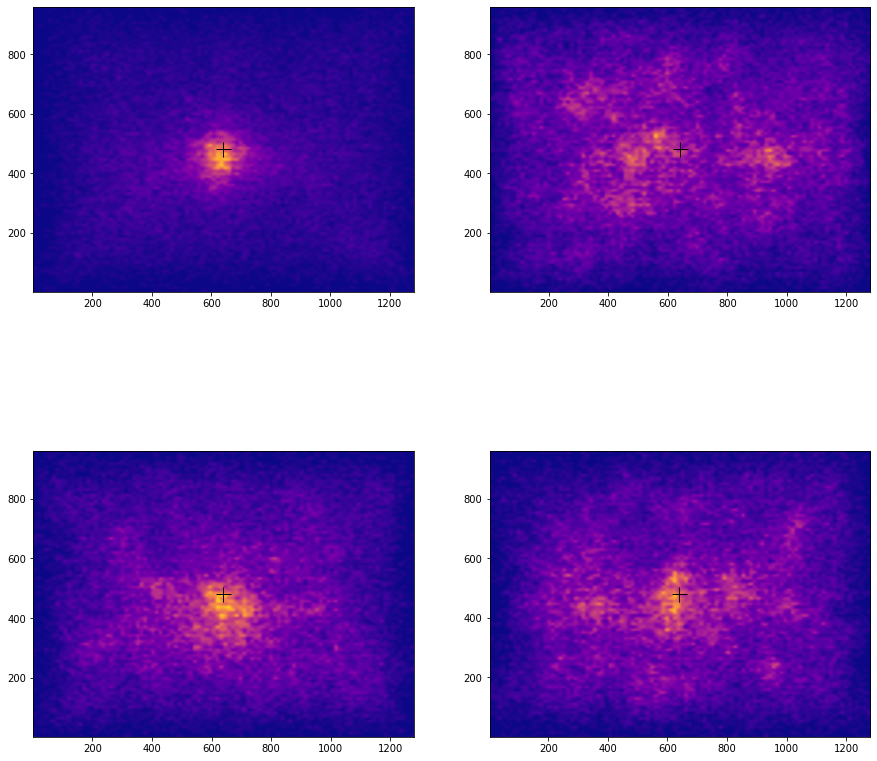

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
categories = df_cleaned["str_category"].unique()
indices = [(0,0),(0,1),(1,0),(1,1)]
for index, category in zip(indices, categories):
    x = df_cleaned.loc[df_cleaned.str_category==category]["x"]
    y = df_cleaned.loc[df_cleaned.str_category==category]["y"]
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, density=True)
    heatmap = heatmap.T
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[index[0], index[1]].imshow(heatmap, extent=extent, origin='lower', cmap='plasma', interpolation='gaussian')
    axes[index[0], index[1]].plot(1280/2,960/2, marker='+', color='black', markersize=15)
#     axes[index[0], index[1]].set(title=category, xlabel='x-coordinate', ylabel='y-coordinate')

plt.show()

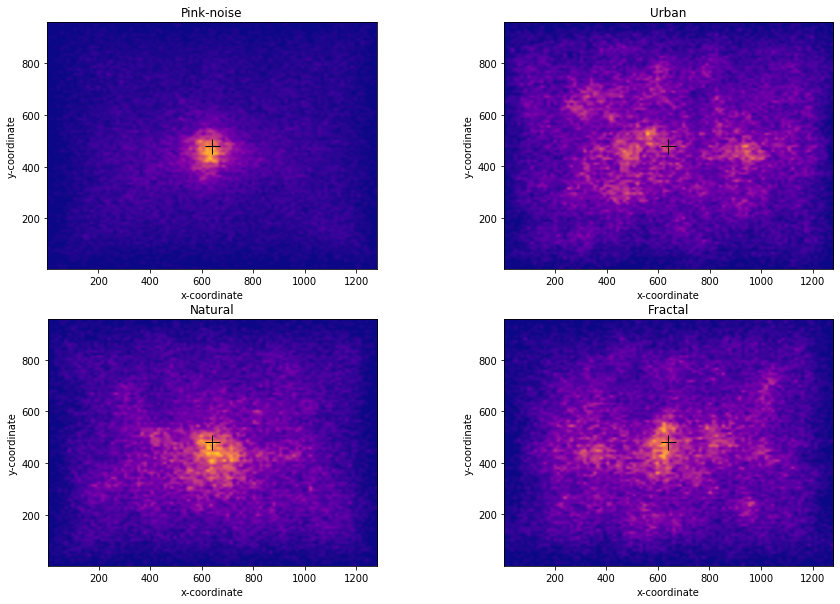

In [29]:
# TODO: Generate one heat map for each stimulus category
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
categories = df_cleaned['str_category'].unique()
indices = [(0,0), (0,1), (1,0), (1,1)]

for category, index in zip(categories, indices):
    X = df_cleaned.loc[df_cleaned.str_category == category]['x']
    Y = df_cleaned.loc[df_cleaned.str_category == category]['y']
    heatmap, xedges, yedges = np.histogram2d(X, Y, bins=100, density=True)
    heatmap = heatmap.T
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    axes[index[0], index[1]].imshow(heatmap, extent=extent, origin='lower', cmap='plasma', interpolation='gaussian')
    axes[index[0], index[1]].plot(1280/2,960/2, marker='+', color='black', markersize=15)
    axes[index[0], index[1]].set(title=category, xlabel='x-coordinate', ylabel='y-coordinate')
plt.show()



<div class="alert alert-block alert-info">
    By studying <b>heat maps</b> we can illuminate where people look and how salient a particular region of the stimulus is, but we still haven't really reconstructuted someones viewing pattern. In order to do so, we need to combine the spatial and temporal information and one way of doing this is called <b>scanpath</b>.
</div>

### 3.2 Scanpath

<div class="alert alert-block alert-info">
    The idea of a <b>scanpath</b> is to follow fixation points in a chronological order, revealing when and where people direct their gaze. A scanpath exploits and visualizes both spatial and temporal information in the eye tracking data. Scanpaths can provide insight into cognitive intent and attention of the viewer, as well as salience of the visual stimulus.
</div>

Finally, we want to reconstruct someones viewing pattern. We would like to know whether distinct viewing patterns are associated with images of each of the respective stimuli categories. For each stimulus category, an example image is given below, the paths to the respective image files are stored in the dictionary ```images```. The data associated with each image for subject 42 is stored in the variable ```trial```. Use that data in order to reconstruct a scanpath for each stimulus catgeory. Follow the steps outlined below:

- Plot the image which is associated with the selected trial. You've downloaded those images as zip-files in section 4.1, one zip file for each stimulus category. The dictionary ```images``` contains the file paths for each category. Tipp: Use [```imread()```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html) and [```imshow()```](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) with the keyword arguments ```aspect='auto'```, ```extent=(0,1280,0,960)``` and ```alpha=0.5```.
- Plot fixation points using a [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Make sure to visually discriminate the chronological order and the duration of fixations. Tipp: Take a look at the keyword arguments ```hue``` and ```size``` and look for appropiate attributes in the data frame.
- Draw saccade paths by interpolating fixation points. The function [```arrow()```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.arrow.html) may be helpful.
- The background image, fixation points and saccade paths are supposed to be superimposed on each other (all in one plot), this can be done by explicitly calling the same axes object for several plotting operations.

In [39]:
trial.head()

SUBJECTINDEX  category  dataset_nr     end  eye  filenumber  fix  \
179297          42.0      11.0         3.0   534.0  2.0         9.0  3.0   
179298          42.0      11.0         3.0   786.0  2.0         9.0  4.0   
179299          42.0      11.0         3.0   970.0  2.0         9.0  5.0   
179300          42.0      11.0         3.0  1238.0  2.0         9.0  6.0   
179301          42.0      11.0         3.0  1614.0  2.0         9.0  7.0   

              pupil   start  trial       x      y str_category  duration  bin  
179297  1492.860107   284.0  166.0   493.0  167.0   Pink-noise     250.0  0.0  
179298  1406.062500   576.0  166.0   182.0  195.0   Pink-noise     210.0  0.0  
179299  1347.567261   816.0  166.0   161.0   81.0   Pink-noise     154.0  0.0  
179300  1319.947021  1032.0  166.0   866.0   63.0   Pink-noise     206.0  1.0  
179301  1344.567139  1288.0  166.0  1100.0   95.0   Pink-noise     326.0  1.0

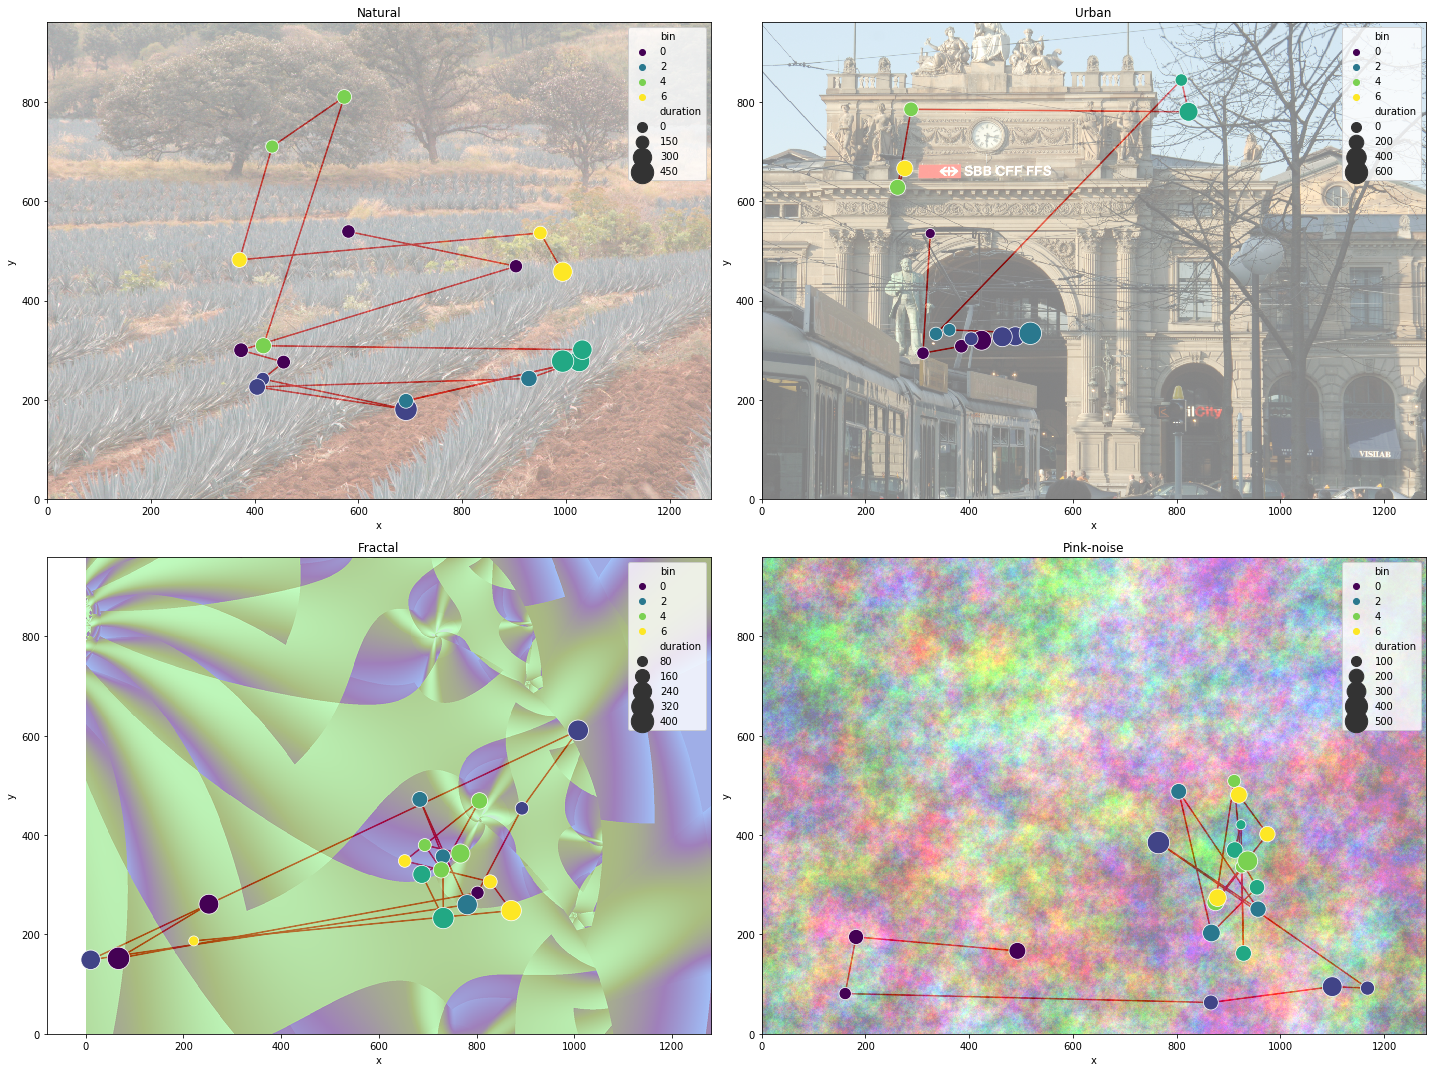

In [60]:
categories = ['Natural', 'Urban', 'Fractal', 'Pink-noise']
images = {'Natural':'Stimuli_7/7/19.png', 'Urban':'Stimuli_8/8/30.png', 'Fractal':'Stimuli_10/10/48.png', 'Pink-noise':'Stimuli_11/11/19.png'}
file_numbers = {'Natural': 19, 'Urban':30, 'Fractal': 48, 'Pink-noise':9}
subject = 42

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

for index, category in enumerate(categories):
    
    trial = df_cleaned[(df_cleaned["SUBJECTINDEX"]==subject) & (df_cleaned["str_category"]==category) &
              (df_cleaned["filenumber"]==file_numbers[category])]
    
    a = plt.imread(images[category])
    axes[index // 2][index % 2].imshow(a, aspect='auto', extent=(0,1280,0,960), alpha=0.5)
    
    # TODO: Reconstruct scanpaths for each stimulus category

    # Plot background image
    
    # Plot fixation points
    scat = sns.scatterplot(data = trial, x = 'x', y = 'y', hue = 'bin', size = 'duration', sizes = (100, 500), ax = axes[index // 2][index % 2], palette = 'viridis')
    
#     scat = sns.scatterplot(x='x', y='y', hue='bin', size='duration', sizes=(100, 500), data=trial, palette='viridis', ax=axes[row_index][column_index])
    
#     # Draw saccade paths by interpolating fixation points
    coordinates_start = list(zip(trial['x'], trial['y']))
    coordinates_end = coordinates_start[1:]
    
    
    for i in range(len(coordinates_end)):
        start_x = coordinates_start[i][0]
        start_y = coordinates_start[i][1]
        end_x = coordinates_end[i][0]
        end_y = coordinates_end[i][1]
        axes[index // 2][index % 2].arrow(x = start_x, y = start_y, dx = end_x-start_x, dy = end_y-start_y, fill = True,
                                         shape = 'full', width = 1, head_width = 0.1, head_starts_at_zero = False,
                                         overhang = 0, color = 'red', alpha = 0.9, zorder = 0)


        axes[index // 2][index % 2].set_title(category)
        
fig.tight_layout()
# plt.show()

In [ ]:
categories = ['Natural', 'Urban', 'Fractal', 'Pink-noise']
images = {'Natural':'7/19.png', 'Urban':'8/30.png', 'Fractal':'10/48.png', 'Pink-noise':'11/9.png'}
file_numbers = {'Natural': 19, 'Urban':30, 'Fractal': 48, 'Pink-noise':9}
subject = 42

for index, category in enumerate(categories):
    print(index, category)

<div class="alert alert-block alert-warning">
    Keep in mind that the scanpaths associated with each of the four images above cannot be generalized to the four stimulus categories, since we only reconstructed the scanpaths of one participant for one image per category. Averaging over all participants and all images of the four stimulus categories would potentially allow to reveal discriminative effects of the stimulus category on fixation patterns. For reasons of simplicity, in the previous exercise we did not reconstruct the scanpaths for all subjects and all stimuli.
</div>

## Summary - What you have learned about eye tracking
Congratulations, you've mastered the eye tracking chapter! By now you should be familiar with the following concepts:
* Studying overt visual attention with eye tracking
* Cleaning eye tracking data
* Analyzing fixations and saccades
* Creating a heat map
* Reconstructing a scanpath

## Further reading
If you want to learn more about eye tracking, the following book offers an exhaustive source of information:
- A.T. Duchowski (2017): Eye Tracking Methodology. Springer International Publishing AG , DOI 10.1007/978-3-319-57883-5_1

## Citations
- Wilming N, Onat S, Ossandón J, Acik A, Kietzmann TC, Kaspar K, Gameiro RR, Vormberg A, König P (2017) An extensive dataset of eye movements during viewing of complex images. Scientific Data 4: 160126. https://doi.org/10.1038/sdata.2016.126  
- Wilming N, Onat S, Ossandón J, Acik A, Kietzmann TC, Kaspar K, Gameiro RR, Vormberg A, König P (2017) Data from: An extensive dataset of eye movements during viewing of complex images. Dryad Digital Repository. https://doi.org/10.5061/dryad.9pf75
- Leys, C., et al., Detecting outliers: Do not use standard deviation around the mean, use absolute deviation around the median, Journal of Experimental Social Psychology (2013). http://dx.doi.org/10.1016/j.jesp.2013.03.013
- Afsari, Z., Ossandón, J. P., & König, P. (2016). The dynamic effect of reading direction habit on spatial asymmetry of image perception. Journal of Vision, 16(11):8, 1–21. https://doi.org/10.1167/16.11.8